In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import glob

In [253]:
#Estilo de gráfio que será gerado 
plt.style.use('seaborn-v0_8') 

# Ranking Melhores Universidades (2025)

# QS University Rankings 2025


O QS World University Rankings é criado pela Quacquarelli Symonds, uma empresa especializada em análise de dados referentes ao ensino superior.
Informações a respeito desse ranking podem ser encontradas nos seguintes links:

- https://en.wikipedia.org/wiki/QS_World_University_Rankings#cite_note-4
- https://www.topuniversities.com/university-rankings



Metodologia:

Para a contrução do ranking 2025 (ranking publicado em 2024) foram analisados os seguintes fatores:

- Academic Reputation (peso 30%) : métrica destinada a avaliar a excelência acadêmica das universidades;
- Employer Reputation (peso 15%) : mede a reputação da universidade entre os empregadores, ou seja, entre as empresas que contratam os alunos. Métrica criada para avaliar a empregabilidade dos alunos;
- Faculty Student Ratio	(peso 10%): métrica para avaliar o ambiente de ensino e aprendizado das universidades;
- Citations per Faculty	(peso 20%): mede o peso da pesquiza produzida. Nessa medida é levado em consideração o tamanho da universidade;
- International Faculty Ratio (5%): proporção de professores estrangeiros na universidade;
- International Student Ratio (5%): proporção de estudantes estrangeiros na universidade
- International Research Network (5%): mede a coloboração da universidade com instituições estrangeiras no desenvolvimento de pesquisas. Esse tipo de colaboração gera publicações com co-autoria entre intituições de países diferentes;	
- Employment Outcomes (5%): mede a capacidade da universidade em ofecer alto nível de empregabilidade aos seus alunos e também o sucesso dos alunos em suas respectivas carreras profissionais. Nesse segundo aspecto busca medir a capacidade da instituição de produzir líderes que terão impacto significativo em suas áreas de atuação;	
- Sustainability:busca avaliar o impacto social e ambiental das universidades.	


Para rankings anteriores a 2023 foram considerados os seguintes fatores:

- Academic Reputation (40%);
- Employer Reputation (10%);
- Faculty Student Ratio (20%);
- Citations per Faculty (20%);
- International Faculty Ratio (5%);
- International Student Ratio (5%).

Informações a respeito da metodologia podem ser encontradas nos seguintes links:

- https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings
- https://support.qs.com/hc/en-gb/sections/360005689220-Our-Methods












## Carregar Dados


In [254]:
'''
Links para download dos dados:

ranking 2025: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025
ranking 2024: https://www.kaggle.com/datasets/joebeachcapital/qs-world-university-rankings-2024
ranking 2023: https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223
ranking 2017_2022: https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022
'''


path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/QS University Rankings/'

df_qs_2025     =pd.read_csv(path+'QS_2025.csv')
df_qs_2024     =pd.read_csv(path+'QS_2024.csv')
df_qs_2023     =pd.read_csv(path+'QS_2023.csv')
df_qs_2017_2022=pd.read_csv(path+'QS_2017_2022.csv')



## Análise Exploratória

- As colunas em rankings diferentes não estão com o mesmo nome;
- O número de colunas nos rankings de 2017 a 2022 é menor, em virtude da mudança da metodologia;
- O significado de cada coluna para os rankings a partir de 2023 está descrito na metodologia logo acima.Já para os rankings entre 2017 e 2022 a descrição está logo abaixo.

In [255]:
df_qs_2025.columns

Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Location',
       'Location Full', 'Size', 'Academic Reputation', 'Employer Reputation',
       'Faculty Student', 'Citations per Faculty', 'International Faculty',
       'International Students', 'International Research Network',
       'Employment Outcomes', 'Sustainability', 'QS Overall Score'],
      dtype='object')

In [256]:
df_qs_2024.columns

Index(['2024 RANK', '2023 RANK', 'Institution Name', 'Country Code', 'Country',
       'SIZE', 'FOCUS', 'RES.', 'AGE', 'STATUS', 'Academic Reputation Score',
       'Academic Reputation Rank', 'Employer Reputation Score',
       'Employer Reputation Rank', 'Faculty Student Score',
       'Faculty Student Rank', 'Citations per Faculty Score',
       'Citations per Faculty Rank', 'International Faculty Score',
       'International Faculty Rank', 'International Students Score',
       'International Students Rank', 'International Research Network Score',
       'International Research Network Rank', 'Employment Outcomes Score',
       'Employment Outcomes Rank', 'Sustainability Score',
       'Sustainability Rank', 'Overall SCORE'],
      dtype='object')

In [257]:
df_qs_2023.columns
 
#Abreviações usadas nas colunas do ranking de 2023

#ar  - academic reputation
#er  - employer reputation 
#fsr - faculty student score
#cpf - citations per faculty
#ifr - international faculty score
#isr - international students rank
#irn - international research network
#ger - employment outcome score

Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')

In [258]:
df_qs_2017_2022.columns

Index(['university', 'year', 'rank_display', 'score', 'link', 'country',
       'city', 'region', 'logo', 'type', 'research_output',
       'student_faculty_ratio', 'international_students', 'size',
       'faculty_count'],
      dtype='object')

As colunas nos ranking entre 2017 e 2022 são diferentes das demais em virtude da mudança na metodologia. Para esse ranking as colunas presentes no dataframe são as seguintes:

- university - name of the university;
- year - year of ranking;
- rank_display - rank given to the university;
- score - score of the university based on the six key metrics mentioned above;
- link - link to the university profile page on QS website;
- country - country in which the university is located;
- city - city in which the university is located;
- region - continent in which the university is located;
- logo - link to the logo of the university;
- type - type of university (public or private);
- research_output - quality of research at the university;
- student_faculty_ratio - number of students assigned to per faculty;
- international_students - number of international students enrolled at the university;
- size - size of the university in terms of area;
- faculty_count - number of faculty or academic staff at the university.






In [259]:
#Número de Universidades avaliadas

print('Número de Universidades avaliadas no ranking de 2025: {}'.format(len(df_qs_2025)))
print('Número de Universidades avaliadas no ranking de 2024: {}'.format(len(df_qs_2024)))
print('Número de Universidades avaliadas no ranking de 2023: {}'.format(len(df_qs_2023)))
for year in range(2022,2016,-1):
    num_universidades=df_qs_2017_2022[df_qs_2017_2022['year']==year]
    print('Número de Universidades avaliadas no ranking de {}: {}'.format(str(year),len(num_universidades)))


Número de Universidades avaliadas no ranking de 2025: 1503
Número de Universidades avaliadas no ranking de 2024: 1498
Número de Universidades avaliadas no ranking de 2023: 1422
Número de Universidades avaliadas no ranking de 2022: 1300
Número de Universidades avaliadas no ranking de 2021: 1185
Número de Universidades avaliadas no ranking de 2020: 1069
Número de Universidades avaliadas no ranking de 2019: 1018
Número de Universidades avaliadas no ranking de 2018: 977
Número de Universidades avaliadas no ranking de 2017: 933


### Ranking 2025

In [260]:
df_qs_2025.info()
#Valores de alguns indicadores estão ausentes para certas universidades

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

In [261]:
# A coluna QS Overall Score deveria ser inteiro, mas está no formato object
df_qs_2025.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [262]:
#Valores ausentes estão como a string '-'
df_qs_2025['QS Overall Score']

0        100
1       98.5
2       96.9
3       96.8
4       96.7
        ... 
1498       -
1499       -
1500       -
1501       -
1502       -
Name: QS Overall Score, Length: 1503, dtype: object

In [263]:
#Substituir os valores '-' na coluna QS Overall Score por nan (not a number)
df_qs_2025.loc[df_qs_2025['QS Overall Score']=='-','QS Overall Score']=np.nan

In [264]:
#Converter a coluna QS Overall Score para inteiro
df_qs_2025['QS Overall Score']=df_qs_2025['QS Overall Score'].astype('float64')

In [265]:
#QS Overall Score foi convertido para float64
#QS Overall Score só estava disponível para 600 universidades
df_qs_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

In [266]:
#Criar colunas com rankings de cada indicador
#Cada uma dessas colunas terá a posição no ranking da universidade de acordo com o indicador
df_qs_2025['Academic Reputation Rank']            =df_qs_2025['Academic Reputation'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['Employer Reputation Rank']            =df_qs_2025['Employer Reputation'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['Faculty Student Rank']                =df_qs_2025['Faculty Student'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['Citations per Faculty Rank']          =df_qs_2025['Citations per Faculty'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['International Faculty Rank']          =df_qs_2025['International Faculty'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['International Students Rank']         =df_qs_2025['International Students'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['International Research Network Rank'] =df_qs_2025['International Research Network'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['Employment Outcomes Rank']            =df_qs_2025['Employment Outcomes'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['Sustainability Rank']                 =df_qs_2025['Sustainability'].rank(numeric_only=True,ascending=False,method='min')
df_qs_2025['Overall Score Rank']                  =df_qs_2025['QS Overall Score'].rank(numeric_only=True,ascending=False,method='min')

In [267]:
#Ranking criados estão no formato numérico
df_qs_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   2025 Rank                            1503 non-null   object 
 1   2024 Rank                            1482 non-null   object 
 2   Institution Name                     1503 non-null   object 
 3   Location                             1503 non-null   object 
 4   Location Full                        1503 non-null   object 
 5   Size                                 1503 non-null   object 
 6   Academic Reputation                  1503 non-null   float64
 7   Employer Reputation                  1503 non-null   float64
 8   Faculty Student                      1503 non-null   float64
 9   Citations per Faculty                1503 non-null   float64
 10  International Faculty                1403 non-null   float64
 11  International Students        

### Ranking 2024


In [268]:
df_qs_2024.info()
#Todas colunas no formato objeto
#As colunas com valores para os indicadores devem ser verificadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   2024 RANK                             1498 non-null   object
 1   2023 RANK                             1416 non-null   object
 2   Institution Name                      1498 non-null   object
 3   Country Code                          1498 non-null   object
 4   Country                               1498 non-null   object
 5   SIZE                                  1475 non-null   object
 6   FOCUS                                 1497 non-null   object
 7   RES.                                  1411 non-null   object
 8   AGE                                   1472 non-null   object
 9   STATUS                                1456 non-null   object
 10  Academic Reputation Score             1498 non-null   object
 11  Academic Reputation Rank      

In [269]:
df_qs_2024.head()

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3


In [270]:
#Remover a primeira linha
df_qs_2024.drop(0,axis=0,inplace=True)
df_qs_2024.head()

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3
5,5,3,Stanford University,US,United States,L,FC,VH,5,B,...,78,51.2,284,95.8,44,100,2,94.4,63,98.1


In [271]:
#Verificar últimas linhas
#Nas colunas com rank os últimos valores estão com algarismos misturados com letras, por exemplo 701+
#As colunas com score serão convertidas para float64
df_qs_2024.tail(5)

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
1493,1401+,1401+,University of Oradea,RO,Romania,L,FC,MD,4,A,...,701+,7.0,701+,1.8,701+,5.9,701+,2.2,701+,-
1494,1401+,NaN,University of Stavanger,NO,Norway,NaN,CO,NaN,2,NaN,...,NaN,NaN,NaN,26.3,489,NaN,NaN,NaN,NaN,-
1495,1401+,1201-1400,"University Politehnica of Timisoara, UPT",RO,Romania,M,FO,VH,5,A,...,701+,2.9,701+,1.3,701+,8.5,701+,1,701+,-
1496,1401+,1201-1400,Western Washington University,US,United States,L,CO,HI,5,NaN,...,676,1.4,701+,1.0,701+,7.3,701+,NaN,NaN,-
1497,1401+,NaN,Zürcher Hochschule Winterthur,CH,Switzerland,NaN,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,1.7,701+,NaN,NaN,NaN,NaN,-


In [272]:
colunas_score=[] #colunas que serão convertidas para valores numéricos
for coluna in df_qs_2024.columns:
    if 'score'  in coluna.lower():
        colunas_score+=[coluna]
colunas_score

['Academic Reputation Score',
 'Employer Reputation Score',
 'Faculty Student Score',
 'Citations per Faculty Score',
 'International Faculty Score',
 'International Students Score',
 'International Research Network Score',
 'Employment Outcomes Score',
 'Sustainability Score',
 'Overall SCORE']

In [273]:
#Alguns valores ausentes nas colunas que serão convertidas para numéricas estão como a string '-'
#Substituir a string '-' por nan e em seguida converter para formato numérico
for coluna in colunas_score:
    df_qs_2024.loc[df_qs_2024[coluna]=='-',coluna]=np.nan
    df_qs_2024[coluna]=pd.to_numeric(df_qs_2024[coluna])

In [274]:
df_qs_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 1 to 1497
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   2024 RANK                             1497 non-null   object 
 1   2023 RANK                             1415 non-null   object 
 2   Institution Name                      1497 non-null   object 
 3   Country Code                          1497 non-null   object 
 4   Country                               1497 non-null   object 
 5   SIZE                                  1474 non-null   object 
 6   FOCUS                                 1496 non-null   object 
 7   RES.                                  1410 non-null   object 
 8   AGE                                   1471 non-null   object 
 9   STATUS                                1455 non-null   object 
 10  Academic Reputation Score             1497 non-null   float64
 11  Academic Reputati

In [275]:
#Criar coluna com rank baseado em overall score
df_qs_2024['Overall Score Rank']=df_qs_2024['Overall SCORE'].rank(numeric_only=True,ascending=False,method='min')


### Ranking 2023


In [276]:
df_qs_2023.head()

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [277]:
#todas as colunas com os scores (exceto score scaled ) já estão em formato numérico
df_qs_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [278]:
#valores ausentes estão como a string '-'
df_qs_2023['score scaled']

0        100
1       98.8
2       98.5
3       98.4
4       97.6
        ... 
1417       -
1418       -
1419       -
1420       -
1421       -
Name: score scaled, Length: 1422, dtype: object

In [279]:
#substistuir a string '-' por np.nan e em seguida converter a coluna score scaled para valores numéricos
df_qs_2023.loc[df_qs_2023['score scaled']=='-','score scaled']=np.nan
df_qs_2023['score scaled']=pd.to_numeric(df_qs_2023['score scaled'])

In [280]:
df_qs_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [281]:
#Criar coluna com rank baseado em overall score
df_qs_2023['Overall Score Rank']=df_qs_2023['score scaled'].rank(numeric_only=True,ascending=False,method='min')


### Rankings 2017 a 2022


In [282]:
df_qs_2017_2022.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [283]:
df_qs_2017_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [284]:
#As colunas faculty_count e international_students estão no formato string mas são valores numéricos

df_qs_2017_2022.loc[:,['faculty_count','international_students']]

,faculty_count,international_students
0,"3,065","3,730"
1,"4,725","3,879"
2,"4,646","5,877"
3,"5,800","7,925"
4,968,692
...,...,...
6477,"1,174",57
6478,"3,504",585
6479,"1,113","2,826"
6480,"1,688","2,394"


In [285]:
#Primeiro passo é remover a , das colunas para possibilittar a conversão para valores numéricos
df_qs_2017_2022['faculty_count']=df_qs_2017_2022['faculty_count'].str.replace(',','')
df_qs_2017_2022['faculty_count']=pd.to_numeric(df_qs_2017_2022['faculty_count'])

df_qs_2017_2022['international_students']=df_qs_2017_2022['international_students'].str.replace(',','')
df_qs_2017_2022['international_students']=pd.to_numeric(df_qs_2017_2022['international_students'])

In [286]:
#Duas formas para o mesmo dado: Very High e Very high
df_qs_2017_2022['research_output'].value_counts()

research_output
Very High    4558
High         1424
Medium        424
Low            46
Very high      28
Name: count, dtype: int64

In [287]:
#Substituir o valor para que Very High apareça de uma única forma.
df_qs_2017_2022['research_output']=df_qs_2017_2022['research_output'].str.replace('high','High')

In [288]:
#O tipo da universidade está correto, não e necessária nenhuma alteração
df_qs_2017_2022['type'].value_counts()

type
Public     5284
Private    1186
Name: count, dtype: int64

### Alterar nome das colunas

- Padronizar o nome das colunas nos dataframes;
- A metodologia para o cálculo dos rankings é a mesma a partir de 2023, portanto as colunas são as mesmas nos dataframes referentes a esses anos;
- As colunas são diferentes para os dataframes dos rankings de 2017 a 2022.


In [289]:
df_qs_2025['Academic Reputation']

0       100.0
1        98.5
2       100.0
3       100.0
4       100.0
        ...  
1498      3.0
1499      5.6
1500      7.2
1501      4.1
1502      2.6
Name: Academic Reputation, Length: 1503, dtype: float64

In [290]:
df_qs_2025.rename(columns={'Location':'Country Code','Location Full':'Country','Academic Reputation':'Academic Reputation Score','Employer Reputation':'Employer Reputation Score',
                    'Faculty Student':'Faculty Student Score','Citations per Faculty':'Citations per Faculty Score','International Faculty':'International Faculty Score',
                    'International Students':'International Students Score','International Research Network':'International Research Network Score',
                    'Employment Outcomes':'Employment Outcomes Score','Sustainability':'Sustainability Score','QS Overall Score':'Overall Score'},inplace=True)
df_qs_2024.rename(columns={'SIZE':'Size','Overall SCORE':'Overall Score'},inplace=True)


df_qs_2023.rename(columns={'institution':'Institution Name','location code':'Country Code','location':'Country','ar score':'Academic Reputation Score','ar rank':'Academic Reputation Rank',
               'er score':'Employer Reputation Score','er rank':'Employer Reputation Rank','fsr score':'Faculty Student Score','fsr rank':'Faculty Student Rank',
               'cpf score':'Citations per Faculty Score','cpf rank':'Citations per Faculty Rank','ifr score':'International Faculty Score','ifr rank':'International Faculty Rank',
               'isr score':'International Students Score','isr rank':'International Students Rank','irn score':'International Research Network Score','irn rank':'International Research Network Rank',
               'ger score':'Employment Outcomes Score','ger rank':'Employment Outcomes Rank','score scaled':'Overall Score'},inplace=True)

df_qs_2017_2022.rename(columns={'university':'Institution Name','size':'Size','country':'Country','score':'Overall Score',
                                'rank_display':"Overall Score Rank"},inplace=True)

### Agrupar dataframes

- Os dados dos rankings de 2023 a 2025 serão agrupados em um único dataframe por terem sido criados com a mesma metodologia;
- Os rankings anteriores já estão agrupados em um único dataframe e foram criados com metodologia diferente da usada para os rankings mais recentes.

In [291]:
#Criar coluna com o ano do ranking

df_qs_2025['year']=2025
df_qs_2024['year']=2024
df_qs_2023['year']=2023

df_qs_2023_2025=pd.concat([df_qs_2025,df_qs_2024,df_qs_2023],axis=0)


In [292]:
df_qs_2017_2022[df_qs_2017_2022['year']==2018].loc[:,'Country']

933      United States
934      United States
935      United States
936      United States
937     United Kingdom
             ...      
1905            France
1906     United States
1907    Czech Republic
1908            Israel
1909           Germany
Name: Country, Length: 977, dtype: object

## Análise dos Rankings 

### Melhores colocadas ao longo dos anos

- O MIT apareceu na primeira posição em todos os ranking de 2017 a 2025.

In [293]:
def best_universities(dados_17_22,dados_23_25,name_column='Institution Name',location_column='Country',n_rank=10,column_year='year'):
    '''
    Função que retorna um dataframe com as primeiras n universidades melhores colocadas nos rankings de 2017 a 2025 e outro dataframe com a localização dessas universidades

    Inputs:
        dados_17_22:      Pandas dataframe com os rankings de 2027 a 2022
        dados_23_25:      Pandas dataframe com os rankings de 2023 a 2025
        name_column:      (str) coluna onde estão o nome das univeridades nos dataframes
        location_column:  (str) coluna onde estão os países de origem das universidades
        n_rank:           (int) número de universidades que serão usadas na contrução do dataframe (por exemplo, se n_rank=10 então o dataframe retornado 
                                contará com as 10 primeiras colocadas)
        column_year:      (str) coluna onde estão as informações a respeito do ano do ranking

    Outputs:
        location:         Pandas dataframe com uma coluna para cada ano de 2017 a 2025. Em cada coluna estão os países de origem das universidades melhores colocadas em cada ano
        name    :         Pandas dataframe com uma coluna para cada ano de 2017 a 2025. Em cada coluna estão os nomes das universidades melhores colocadas em cada ano
    '''
    
    location={} #dicionário que receberá a localização das universidadas melhores colocadas
    name={}     #dicionário que receberá os nomes das universidadas melhores colocadas
    anos_iniciais=np.arange(2017,2023) #rankings presentes no dataframe dados_17_22
    anos_finais  =np.arange(2023,2026) #rankings presentes no dataframe dados_23_25
    
    index_location_initial  =dados_17_22.columns.to_list().index(location_column) #obter o index da colunas (necessário para uso do iloc)
    index_name_initial      =dados_17_22.columns.to_list().index(name_column)

    index_location_final  =dados_23_25.columns.to_list().index(location_column)
    index_name_final      =dados_23_25.columns.to_list().index(name_column)

    #preencher os dicionários
    for ano in anos_iniciais:
        location[str(ano)]=dados_17_22[dados_17_22[column_year]==ano].iloc[:n_rank,[index_location_initial]].reset_index(drop=True)
        name[str(ano)]    =dados_17_22[dados_17_22[column_year]==ano].iloc[:n_rank,[index_name_initial]].reset_index(drop=True)

    for ano in anos_finais:
        location[str(ano)]=dados_23_25[dados_23_25[column_year]==ano].iloc[:n_rank,[index_location_final]].reset_index(drop=True)
        name[str(ano)]    =dados_23_25[dados_23_25[column_year]==ano].iloc[:n_rank,[index_name_final]].reset_index(drop=True)
    
    #concatenar o dicionário para transformá-lo em um dataframe
    location=pd.concat(location,axis=1)
    name    =pd.concat(name,axis=1)

    location=location.droplevel(1,axis=1) #o dataframe resultante tem dois niveis para o nome das colunas (country,year). Esse comando remove o nivel country
    name    =name.droplevel(1,axis=1)

    location.index=np.arange(1,n_rank+1) #index começa em 1 ao invés de zero
    name.index=np.arange(1,n_rank+1)

    return name,location
    

In [294]:
#top_10          - universidades melhores colocadas nos rankings de cada ano
#top_10_location - localização das universidades melhores colocadas nos rankings

top_10,top_10_location=best_universities(df_qs_2017_2022,df_qs_2023_2025)
top_10

,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT)
2,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,University of Oxford,University of Cambridge,University of Cambridge,Imperial College London
3,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Stanford University,Stanford University,University of Oxford,University of Oxford
4,University of Cambridge,California Institute of Technology (Caltech),California Institute of Technology (Caltech),University of Oxford,California Institute of Technology (Caltech),University of Cambridge,University of Oxford,Harvard University,Harvard University
5,California Institute of Technology (Caltech),University of Cambridge,University of Oxford,California Institute of Technology (Caltech),University of Oxford,Harvard University,Harvard University,Stanford University,University of Cambridge
6,University of Oxford,University of Oxford,University of Cambridge,ETH Zurich - Swiss Federal Institute of Techno...,ETH Zurich - Swiss Federal Institute of Techno...,California Institute of Technology (Caltech),California Institute of Technology (Caltech),Imperial College London,Stanford University
7,UCL,UCL,ETH Zurich - Swiss Federal Institute of Techno...,University of Cambridge,University of Cambridge,Imperial College London,Imperial College London,ETH Zurich - Swiss Federal Institute of Techno...,ETH Zurich - Swiss Federal Institute of Techno...
8,ETH Zurich - Swiss Federal Institute of Techno...,Imperial College London,Imperial College London,UCL,Imperial College London,ETH Zurich - Swiss Federal Institute of Techno...,UCL,National University of Singapore (NUS),National University of Singapore (NUS)
9,Imperial College London,University of Chicago,University of Chicago,Imperial College London,University of Chicago,UCL,ETH Zurich - Swiss Federal Institute of Techno...,UCL,UCL
10,University of Chicago,ETH Zurich - Swiss Federal Institute of Techno...,UCL,University of Chicago,UCL,University of Chicago,University of Chicago,"University of California, Berkeley (UCB)",California Institute of Technology (Caltech)


### Localização das primeiras colocadas no ranking

##### Top 10

- O MIT dos Estados Unidos apareceu em primeiro lugar em todos os rankings;
- Somente universidades de 4 países diferentes (United States,United Kingdom,Switzerland and Singapore) apareceram no top 10 em todos esses anos.
- Dos 9 rankings entre 2017 e 2025, em todos eles o primeira posição foi oucupada por um universidade americana e em 5 deles a segunda posição tamém foi oucupada por uma universidade americana;
- Nos ranking de 2017 a 2023, 5 das 10 primeiras colocações foram oucupadas por universidades americanas, enquanto nos rankings de 2024 e 2025 foram 4 americanas no top 10;
- Em todos os 9 rankings, 4 posições no top 10 foram oucupadas por universidades britânicas.
- O top 10 entre 2017 foi 2023 foi preenchido por universidades americanas, britânicas e uma suiça. Já nos rankings de 2024 e 2025 entrou no top 10 uma universidade de Singapura.

In [295]:
#Localização da 10 universidades melhores colocadas nos rankings de 2017 a 2025
top_10_location 

,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom
3,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom
4,United Kingdom,United States,United States,United Kingdom,United States,United Kingdom,United Kingdom,United States,United States
5,United States,United Kingdom,United Kingdom,United States,United Kingdom,United States,United States,United States,United Kingdom
6,United Kingdom,United Kingdom,United Kingdom,Switzerland,Switzerland,United States,United States,United Kingdom,United States
7,United Kingdom,United Kingdom,Switzerland,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Switzerland,Switzerland
8,Switzerland,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Switzerland,United Kingdom,Singapore,Singapore
9,United Kingdom,United States,United States,United Kingdom,United States,United Kingdom,Switzerland,United Kingdom,United Kingdom
10,United States,Switzerland,United Kingdom,United States,United Kingdom,United States,United States,United States,United States


In [296]:
#paises_aparicoes_top_10 contem o número de aparições de cada país no top 10 de cada ano
paises_aparicoes_top_10=top_10_location.apply(pd.Series.value_counts) 
paises_aparicoes_top_10.fillna(value=0,inplace=True)
paises_aparicoes_top_10

,2017,2018,2019,2020,2021,2022,2023,2024,2025
Singapore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
Switzerland,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
United Kingdom,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4
United States,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4,4


In [297]:
#Número de vezes que cada país apareceu em cada posicao nos rankings entre 2017 e 2025
#Por exemplo, nos 9 rankings entre 2017 e 2025, em 9 deles um universidade americana oucupou a primeira posicao, 
# em 5 deles uma universidade americana oucupou a segunda posição e assim por diante
posicoes_por_pais=top_10_location.transpose().apply(pd.Series.value_counts)
posicoes_por_pais.fillna(value=0,inplace=True)
posicoes_por_pais

,1,2,3,4,5,6,7,8,9,10
Singapore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Switzerland,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,1.0
United Kingdom,0.0,4.0,2.0,4.0,4.0,4.0,6.0,5.0,5.0,2.0
United States,9.0,5.0,7.0,5.0,5.0,3.0,0.0,0.0,3.0,6.0


##### Top 100

- Os Estados Unidos teve o maior número de universidades no top 100 em todos os rankings, chegando a ter 32 universidades no top 10 no ano de 2017. Para 2025 esse número foi de 25;
- O Reino Unido e Australia oucupam a segunda e terceira posições respectivamente com maior número de universidades no top 100 para todos os rankings entre 2017 e 2025;
- O número de países diferentes no top 100 vem aumentando. Eram 21 países em 2017 e no ranking de 2025 são 25.

In [298]:
#100 melhores colocadas nos rankings e seus paises de origem
top_100,top_100_location=best_universities(df_qs_2017_2022,df_qs_2023_2025,n_rank=100)
top_100

,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT)
2,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,University of Oxford,University of Cambridge,University of Cambridge,Imperial College London
3,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Stanford University,Stanford University,University of Oxford,University of Oxford
4,University of Cambridge,California Institute of Technology (Caltech),California Institute of Technology (Caltech),University of Oxford,California Institute of Technology (Caltech),University of Cambridge,University of Oxford,Harvard University,Harvard University
5,California Institute of Technology (Caltech),University of Cambridge,University of Oxford,California Institute of Technology (Caltech),University of Oxford,Harvard University,Harvard University,Stanford University,University of Cambridge
...,...,...,...,...,...,...,...,...,...
96,University of Geneva,Lomonosov Moscow State University,University of Southampton,University of Nottingham,University of St Andrews,The University of Sheffield,The University of Sheffield,University of St Andrews,University of Alberta
97,KTH Royal Institute of Technology,University of Science and Technology of China,University of St Andrews,University of Southampton,Lund University,Pennsylvania State University,University of St Andrews,Georgia Institute of Technology,Freie Universitaet Berlin
98,Uppsala University,University of Geneva,University of Science and Technology of China,Boston University,KTH Royal Institute of Technology,Sungkyunkwan University (SKKU),"Trinity College Dublin, The University of Dublin",Freie Universitaet Berlin,Pohang University of Science And Technology (P...
99,Korea University,KTH Royal Institute of Technology,Eindhoven University of Technology,KTH Royal Institute of Technology,University of Nottingham,University of Science and Technology of China,Sungkyunkwan University(SKKU),Purdue University,RWTH Aachen University


In [299]:
paises_aparicoes_top_100=top_100_location.apply(pd.Series.value_counts)
paises_aparicoes_top_100.fillna(value=0,inplace=True)
paises_aparicoes_top_100.sort_values(by='2025',ascending=False)

,2017,2018,2019,2020,2021,2022,2023,2024,2025
United States,32.0,31.0,31.0,29.0,27.0,27.0,27.0,27.0,25.0
United Kingdom,18.0,16.0,18.0,18.0,18.0,17.0,17.0,16.0,15.0
Australia,6.0,7.0,7.0,7.0,7.0,7.0,7.0,9.0,9.0
Germany,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0
Hong Kong SAR,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0
South Korea,4.0,4.0,4.0,5.0,6.0,6.0,6.0,5.0,5.0
China (Mainland),4.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0
France,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
Japan,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
Canada,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0


In [300]:
#Número de países diferentes no top 100 de cada ano
paises_diferentes_top_100=(paises_aparicoes_top_100>0).apply(pd.Series.sum)
paises_diferentes_top_100=pd.DataFrame(paises_diferentes_top_100)
paises_diferentes_top_100.rename(columns={0:'Países diferentes no top 100'},inplace=True)
paises_diferentes_top_100.index.name='Ano'
paises_diferentes_top_100

,Países diferentes no top 100
Ano,
2017,21
2018,21
2019,21
2020,21
2021,22
2022,21
2023,22
2024,23
2025,25


### Análise dos Fatores Considerados para Construção dos Rankings

- Rankings de 2023 a 2025 serão analisados separadamente dos rankings para os anos de 2017 a 2022, em virtude da mudança na metodologia de eleboração dos rankings.

#### Rankings de 2023 a 2025

#### Correlação

Correlação entre seis fatores:

- 'Overall Score';
- 'Academic Reputation Score'
- 'Employer Reputation Score'
- 'Faculty Student Score'
- 'Citations per Faculty Score'
- 'International Faculty Score'
- 'International Students Score'
- 'International Research Network Score'
- 'Employment Outcomes Score'
- 'Overall Score'

In [301]:
#fatores que serão analisados através da correlação 
fatores_analisados=['Overall Score','Academic Reputation Score','Employer Reputation Score','Faculty Student Score','Citations per Faculty Score','International Faculty Score',
                    'International Students Score','International Research Network Score','Employment Outcomes Score']

In [302]:
#Calcular a correlação para os 10 fatores considerados
corr_2023_2025=df_qs_2023_2025.loc[:,fatores_analisados].corr()
corr_2023_2025

,Overall Score,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,International Research Network Score,Employment Outcomes Score
Overall Score,1.000000,0.901235,0.765975,0.331487,0.500139,0.358197,0.407679,0.474719,0.633182
Academic Reputation Score,0.901235,1.000000,0.845017,0.357275,0.528674,0.398827,0.393213,0.585708,0.639981
Employer Reputation Score,0.765975,0.845017,1.000000,0.331887,0.405190,0.338256,0.354931,0.410163,0.618376
Faculty Student Score,0.331487,0.357275,0.331887,1.000000,0.114011,0.177335,0.234648,0.153702,0.261466
Citations per Faculty Score,0.500139,0.528674,0.405190,0.114011,1.000000,0.420205,0.341605,0.506291,0.346230
International Faculty Score,0.358197,0.398827,0.338256,0.177335,0.420205,1.000000,0.707444,0.382421,0.324710
International Students Score,0.407679,0.393213,0.354931,0.234648,0.341605,0.707444,1.000000,0.339908,0.299750
International Research Network Score,0.474719,0.585708,0.410163,0.153702,0.506291,0.382421,0.339908,1.000000,0.396566
Employment Outcomes Score,0.633182,0.639981,0.618376,0.261466,0.346230,0.324710,0.299750,0.396566,1.000000


Análise da correlação linear da pontuação geral (Overall Score):

- Existe uma correlação positiva muito forte com a Academic Reputation Score.Esse fator tem peso 30% no cálculo do overall score;
- Existe uma correlação positiva forte com o impacto Employer Reputation Score (peso 15%) e com Employment Outcomes Score (peso 5%);
- Existe uma correlação positiva moderada com Citations per Faculty Score (peso 20%),International Students Score (peso 5%) e International Research Network Score (peso 5%);
- Existe uma correlação positiva muito fraca com International Faculty Score e Faculty Student Score;


Alguns pontos interessantes verificados no cálculo da correlação linear:

- A reputação acadêmica da instituição tem uma correlação positiva muito forte com a reputação dentre os empregadores, enquanto a correlação positiva é moderada com o impacto acadêmico (citações) da pesquisa produzida e também com a internacionalização da pesquisa (International Research Network Score);
- A reputação entre os empregadores tem a maiores correlações com a reputação acadêmica da instituição (correlação muito forte) e em segundo lugar com o resultado produzido por egressos da instituição (correlação positiva forte);
- O impacto acadêmico das pesquisas produzidas está mais correlacionado com a reputação acadêmica e entre empregadores,com a proporção de professores estrangeiros e com a internacionalização da pesquisa produzida(correlações positivas moderadas);
- A proporção de professores estrangeiros na instituição tem correlação positiva forte com a proporção de alunos estrangeiros, o que parece sugerir que intituições com maiores proporções de professores estrangeiros tendem a atrair maior número de alunos de outros países;
- A internacionalização da pesquisa produzida tem correlação positiva moderada com a reputação da instituição, ou seja, universidades com maiores reputações são capazes de atrair universidades de outros paíse para o desenvolvimento de pesquisas em conjunto;
- O resultado produzido por alunos egressos da instituição tem correlações positivas fortes com as reputações acadêmicas e entre os empregadores.

<Axes: >

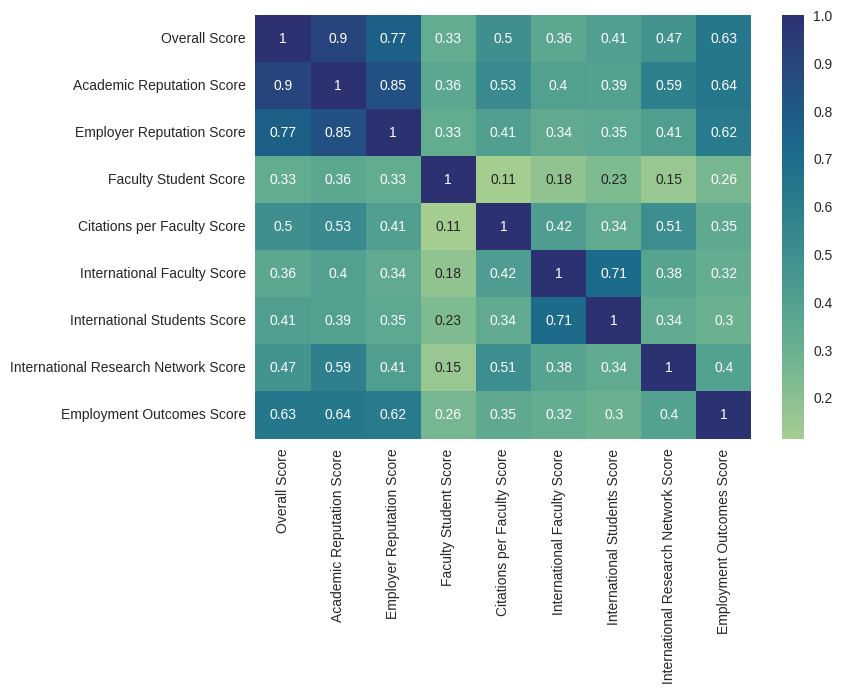

In [303]:
#plotar correlação entre os seis fatores considerados usando seaborn
import matplotlib.pyplot as plt
sns.heatmap(corr_2023_2025, annot=True,cmap="crest")


In [304]:
##plotar correlação entre os seis fatores considerados usando plotly
fig = px.imshow(corr_2023_2025,text_auto=True,color_continuous_scale='RdBu_r')
fig.show()

#### Rankings de 2017 a 2023


In [305]:
df_qs_2017_2022.head()

,Institution Name,year,Overall Score Rank,Overall Score,link,Country,city,region,logo,type,research_output,student_faculty_ratio,international_students,Size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692.0,S,968.0


In [306]:
#Agrupando as universidades de acordo com a pesquisa produzida
df_qs_2017_2022_groupby_ro=df_qs_2017_2022.groupby(by='research_output')[['Overall Score','student_faculty_ratio','international_students','faculty_count']].mean()
df_qs_2017_2022_groupby_ro.reindex(index=['Very High','High','Medium','Low'])
#df_qs_2017_2022_groupby_ro é um dataframe com os universidades agrupadas de acordo com o research output

,Overall Score,student_faculty_ratio,international_students,faculty_count
research_output,,,,
Very High,47.941313,12.407309,2504.186897,1462.180057
High,31.971144,15.312940,740.492846,971.830143
Medium,28.130769,15.214623,668.987174,877.721257
Low,24.600000,16.108696,264.131395,1178.750957


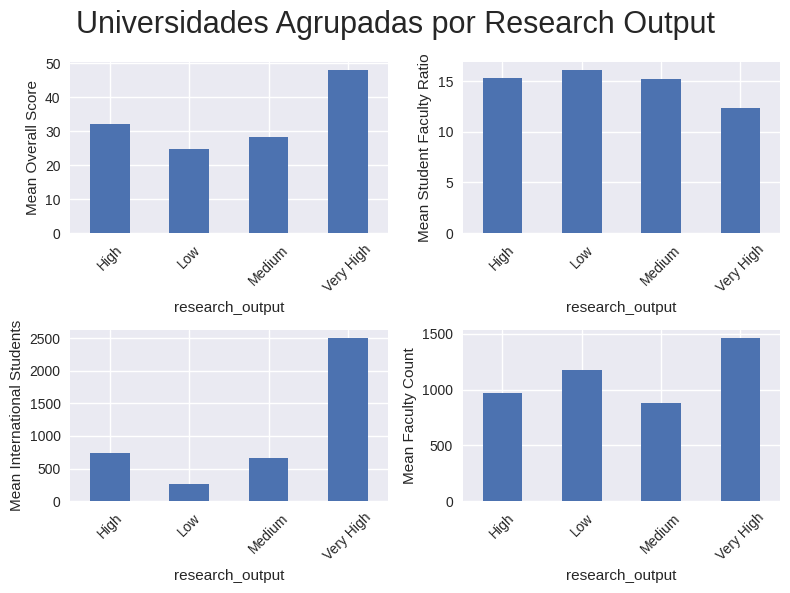

In [307]:
#plotar as médias dos indicadores calculadas para cada indicador após o agrupamento por research_output
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(8,6))

fig.suptitle('Universidades Agrupadas por Research Output', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

df_qs_2017_2022_groupby_ro['Overall Score'].plot(kind='bar',ylabel='Mean Overall Score',ax=axs[0,0])
axs[0,0].tick_params('x',labelrotation=45)
df_qs_2017_2022_groupby_ro['student_faculty_ratio'].plot(kind='bar',ylabel='Mean Student Faculty Ratio',ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=45)
df_qs_2017_2022_groupby_ro['international_students'].plot(kind='bar',ylabel='Mean International Students',ax=axs[1,0])
axs[1,0].tick_params('x',labelrotation=45)
df_qs_2017_2022_groupby_ro['faculty_count'].plot(kind='bar',ylabel='Mean Faculty Count',ax=axs[1,1])
axs[1,1].tick_params('x',labelrotation=45)
fig.tight_layout()


- As universidades mais produtivas tem na média:

    - maiores pontuações gerais de acordo com a metodologia adotada pelo ranking;
    - maiores proporções entre o número de funcionários e de alunos;
    - maior número de estudantes estrangeiros;
    - maior número de funcionários.

In [308]:
#Agrupando as universidades de acordo com o tipo
df_qs_2017_2022_groupby_type=df_qs_2017_2022.groupby(by='type')[['Overall Score','student_faculty_ratio','international_students','faculty_count']].mean()
df_qs_2017_2022_groupby_type #dataframe com as universidades agrupadas de acordo com o tipo

,Overall Score,student_faculty_ratio,international_students,faculty_count
type,,,,
Private,51.361697,11.561082,1232.673039,1195.593077
Public,45.723867,13.651305,2160.104377,1341.109199


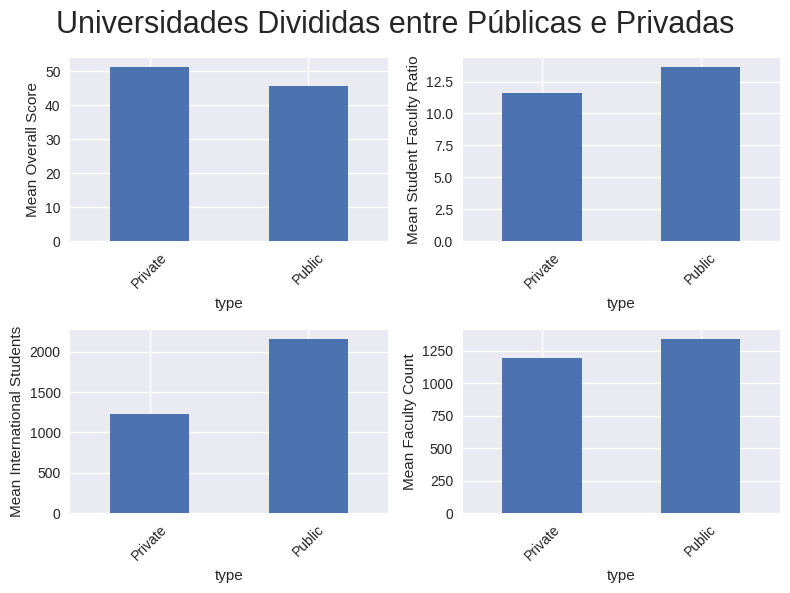

In [309]:
#plotar as médias dos indicadores calculadas para cada indicador após o agrupamento por research_output
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(8,6))

fig.suptitle('Universidades Divididas entre Públicas e Privadas', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

df_qs_2017_2022_groupby_type['Overall Score'].plot(kind='bar',ylabel='Mean Overall Score',ax=axs[0,0])
axs[0,0].tick_params('x',labelrotation=45)
df_qs_2017_2022_groupby_type['student_faculty_ratio'].plot(kind='bar',ylabel='Mean Student Faculty Ratio',ax=axs[0,1])
axs[0,1].tick_params('x',labelrotation=45)
df_qs_2017_2022_groupby_type['international_students'].plot(kind='bar',ylabel='Mean International Students',ax=axs[1,0])
axs[1,0].tick_params('x',labelrotation=45)
df_qs_2017_2022_groupby_type['faculty_count'].plot(kind='bar',ylabel='Mean Faculty Count',ax=axs[1,1])
axs[1,1].tick_params('x',labelrotation=45)
fig.tight_layout()


- No comparativo entre universidade públicas e privadas, as últimas se saíram melhores. Na média elas têm maior pontuação geral nos rankings e maior número de funcionários para cada aluno. Já as universidades publicas tem na média maior número de alunos estrangeiros e maior número de funcionários. Porém, como a proporção de funcionários por aluno é maior para as universidades privadas, o maior número de funcionários nas públicas deve ser acompanhado por um maior número de alunos também nas públicas.


In [310]:
#Calcular a proporção entre públicas e privadas dentro de cada categoria de research output
type_research=df_qs_2017_2022.groupby(by=['research_output','type'])[['type']].count() #contagem de públicas e privadas dentro de cada categoria de research output
index_level_maior=['Very High','High','Medium','Low'] #index externo
index_level_menor=['Private','Public'] #index interno
#o número de universidade publicas e privadas dentro de cada grupo de research output e dividito pelo total de universidades dentro desse mesmo grupo
for index_1 in index_level_maior:
    for index_2 in index_level_menor:
       type_research.loc[(index_1,index_2),'Proporção (%)']= type_research.loc[(index_1,index_2),'type']/type_research.loc[(index_1),'type'].sum().item()
type_research.index.names=['Research Output',"Tipo da Universidade"]
type_research.rename(columns={'type':'Tipo da Universidade (Count)'},inplace=True)
type_research

Tipo da Universidade (Count)  \
Research Output Tipo da Universidade                                 
High            Private                                        322   
                Public                                        1102   
Low             Private                                         26   
                Public                                          20   
Medium          Private                                        195   
                Public                                         229   
Very High       Private                                        643   
                Public                                        3933   

                                      Proporção (%)  
Research Output Tipo da Universidade                 
High            Private                    0.226124  
                Public                     0.773876  
Low             Private                    0.565217  
                Public                     0.434783  
Medium          Private                    0.459906  
                Public                     0.540094  
Very High       Private                    0.140516  
                Public                     0.859484

<Axes: xlabel='Research Output', ylabel='Proporção (%)'>

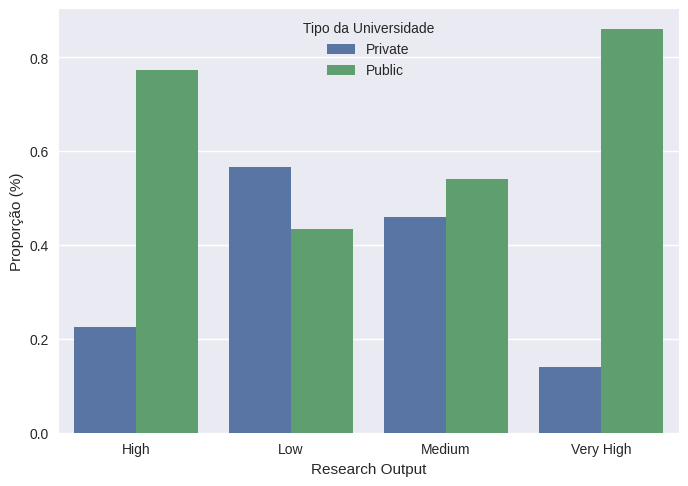

In [311]:
sns.barplot(data=type_research.reset_index(),x='Research Output',y='Proporção (%)',hue='Tipo da Universidade')

- Dentre as universidades com produtividades muito altas e altas na pesquisa a proporção de universidades privadas é muito superior a de públicas. O contrário acontece no Brasil, onde a pesquisa é desenvolvida majoritariamente em universidades públicas.

### Construção de rankings baseados em outros fatores

Função para criação de ranking de acordo com um dos seguintes indicadores:
 
 - Academic Reputation;
 - Employer Reputation;
 - Faculty Student;
 - Citations per Faculty;
 - International Faculty;
 - International Research Network;
 - Employment Outcomes.

In [312]:
def ranking_fator_selecinado(dados,ano,fator,n_posicoes,overall_ranking='Overall Score Rank',name_universities='Institution Name',
                             location='Country',coluna_ano='year'):
    '''
    Função para gerar uma ranking para o fator desejado

    Inputs:
        dados             - Pandas dataframe com os rankings para cada ano
        ano               - (int) ano selecionado para o qual o ranking será criado
        fator             - (str) nome do fator considerado na construcao do ranking. Fatores aceitos são: 'Academic Reputation','Employer Reputation Rank','Faculty Student','Citations per Faculty','International Faculty',
                                'International Research Network','Employment Outcomes'
        n_posicoes        - (int) número de posições no ranking gerado. Serão incluídas desde a posição 1 até n_posicões
        overall_ranking   - (str) nome da coluna do dataframe dados que contem a posição das universidade no ranking geral
        name_universities - (str) nome da coluna no dataframe dados que contem o nome das universidade
        location          - (str) nome da coluna no dataframe com os paises de origem das universidades
        coluna_ano        - (str) nome da coluna no dataframe dados com o ano do ranking

    
    '''
    fator_rank=fator+' Rank' #serão usadas as colunas com os rakings, coluna essas ja presentes no dataframe dados
    if fator not in ['Academic Reputation','Employer Reputation Rank','Faculty Student','Citations per Faculty','International Faculty',
                    'International Research Network','Employment Outcomes']:
        raise Exception('Fator selecionador deve ser um dos seguintes: Academic Reputation, Employer Reputation, Faculty Student, Citations per Faculty, International Faculty, International Research Network, Employment Outcomes')


    dados=dados.loc[dados[coluna_ano]==ano,:] #selecionar o ano
    
    #o overall scores não está disponível para universidade a partir de uma certa posição no ranking. Por exemplo, para o ranking
    # de 2025 o overall score está disponível para as 600 universidades melhores colocadas. O novo ranking só será criado se 
    #todas universidade tiverem overall score disponível
    num_not_null=dados.loc[:,[overall_ranking]].notna().sum().item() 
    if n_posicoes>=num_not_null:
        raise Exception('Número de universidades no rankind deve ser menor ou igual a {}'.format(num_not_null))

    dados_ordenados=dados.sort_values(by=fator_rank).reset_index(drop=True) #ordenar os valores de acordo com o fator selecionado
    dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,location]] #selecionar o número especificado de linhas e somente as colunas desejadas
    dados_ordenados[overall_ranking]= dados_ordenados[overall_ranking].astype('int16',copy=True)
    dados_ordenados.rename(columns={overall_ranking:'Ranking Geral',name_universities:'Top '+str(n_posicoes)+' '+fator},inplace=True)
    dados_ordenados.index=np.arange(1,n_posicoes+1) #index começando em zero
    return dados_ordenados

In [313]:
#Exemplo: 20 melhores universidades de acordo com o critério Citations per Faculty e suas posições no ranking geral
ranking_2024_research=ranking_fator_selecinado(df_qs_2023_2025,2025,'Citations per Faculty',20)
ranking_2024_research

,Ranking Geral,Top 20 Citations per Faculty,Country
1,1,Massachusetts Institute of Technology (MIT),United States
2,383,Anna University,India
3,183,Hamad Bin Khalifa University,Qatar
4,4,Harvard University,United States
5,62,City University of Hong Kong,Hong Kong SAR
6,22,Princeton University,United States
7,403,Amirkabir University of Technology,"Iran, Islamic Republic of"
8,10,California Institute of Technology (Caltech),United States
9,359,Gwangju Institute of Science and Technology (G...,South Korea
10,326,Daegu Gyeongbuk Institute of Science and Techn...,South Korea


Função para criação de um dataframe com universidades em cada coluna rankeadas de acordo com os seguintes fatores:

 - Overall Score ;
 - Academic Reputation;
 - Employer Reputation;
 - Faculty Student;
 - Citations per Faculty;
 - International Faculty;
 - International Research Network;
 - Employment Outcomes
 

In [314]:
def ranking_diversos_fatores(dados,ano,n_posicoes,fatores,
                             coluna_overall='Overall Score',coluna_ano='year',coluna_names='Institution Name'):
    """
    Função para crição de um dataframe com onde em cada coluna as universides aparecem ranqueadas de acordo com um fator

    Inputs:
        dados        - Pandas dataframe com os rankings para todos os anos
        ano          - (str) Ranking relativos ao ano especificado
        n_posicoes   - (int) Número de posições que aparecerão no ranking
        coluna_names - (str) Nome da coluna com o nome das universidades
        fatores      - (list) Lista com os fatores que serão considerados pra a contrução do dataframe

    Outpout:
        Pandas dataframe em que em uma coluna as universidades aparecem rankeadas de acordo com o overall scores e nas demais
        de acordos com os fatores especificados em fatores
        
    """
    
    #o overall scores não está disponível para universidade a partir de uma certa posição no ranking. Por exemplo, para o ranking
    # de 2025 o overall score está disponível para as 600 universidades melhores colocadas. O novo ranking só será criado se 
    #todas universidade tiverem overall score disponível
    num_not_null=dados.loc[:,[coluna_overall]].notna().sum().item() 
    if n_posicoes>=num_not_null:
        raise Exception('Número de universidades no ranking deve ser menor ou igual a {}'.format(num_not_null))

    dados_ano_selecionado=dados.loc[dados[coluna_ano]==ano,:] #seleção dos dados para o ano especificado
    ranking_fatores=dados_ano_selecionado.loc[:n_posicoes-1,[coluna_names]] #universidades ordenadas de acordo com overall ranking
    ranking_fatores.rename(columns={coluna_names: 'Ranking '+'Geral'},inplace=True)
    
    for num,factor in enumerate(fatores):
        dados_fator=dados_ano_selecionado.sort_values(by=factor+' Rank').reset_index(drop=True)
        dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]]
        dados_fator.rename(columns={coluna_names:'Ranking '+fatores[num]},inplace=True)
        ranking_fatores=pd.concat([ranking_fatores,dados_fator],axis=1)
    ranking_fatores.index=np.arange(1,n_posicoes+1)
    
    return ranking_fatores

In [315]:
#Exemplo: Top 20 para o ano de 2024

fatores=['Academic Reputation','Employer Reputation','Faculty Student','Citations per Faculty','International Faculty',
         'International Research Network','Employment Outcomes']

top_20_2024=ranking_diversos_fatores(df_qs_2023_2025,2024,5,fatores,)
top_20_2024

,Ranking Geral,Ranking Academic Reputation,Ranking Employer Reputation,Ranking Faculty Student,Ranking Citations per Faculty,Ranking International Faculty,Ranking International Research Network,Ranking Employment Outcomes
1,Massachusetts Institute of Technology (MIT),Princeton University,Institut Polytechnique de Paris,Tokyo Medical and Dental University (TMDU),Carnegie Mellon University,Khalifa University of Science and Technology,The University of Manchester,Columbia University
2,University of Cambridge,Georgia Institute of Technology,University of Illinois at Urbana-Champaign,University of Jyväskylä,University of Waterloo,The University of Edinburgh,University of Zurich,Carnegie Mellon University
3,University of Oxford,Chulalongkorn University,University of Glasgow,Imam Abdulrahman Bin Faisal University (IAU) (...,Rice University,University College Dublin,Universität Hamburg,Sapienza University of Rome
4,Harvard University,Utrecht University,The Australian National University,Swarthmore College,The University of Hong Kong,Lund University,Monash University,University of Latvia
5,NaN,Harvard University,Harvard University,University of Northern British Columbia,Harvard University,Al Ain University,University of Oxford,Harvard University


## Universidades Brasileiras

In [316]:
df_qs_2017_2022.loc[df_qs_2017_2022["Country"]=='Brazil',:]

,Institution Name,year,Overall Score Rank,Overall Score,link,Country,city,region,logo,type,research_output,student_faculty_ratio,international_students,Size,faculty_count
119,Universidade de São Paulo,2017,120,59.0,https://www.topuniversities.com/universities/u...,Brazil,São Paulo,Latin America,https://www.topuniversities.com/sites/default/...,Public,Very High,13.0,1858.0,XL,4943.000
191,Universidade Estadual de Campinas (Unicamp),2017,191,48.0,https://www.topuniversities.com/universities/u...,Brazil,Campinas,Latin America,https://www.topuniversities.com/sites/default/...,Public,Very High,15.0,944.0,L,1875.000
320,Universidade Federal do Rio de Janeiro,2017,321,35.3,https://www.topuniversities.com/universities/u...,Brazil,Rio de Janeiro,Latin America,https://www.topuniversities.com/sites/default/...,Public,Very High,11.0,555.0,XL,3.983
461,Universidade Federal do Rio Grande Do Sul,2017,461-470,NaN,https://www.topuniversities.com/universities/u...,Brazil,Porto Alegre,Latin America,https://www.topuniversities.com/sites/default/...,Public,Very High,13.0,560.0,XL,3.196
505,Pontifícia Universidade Católica do Rio de Jan...,2017,501-550,NaN,https://www.topuniversities.com/universities/p...,Brazil,Rio de Janeiro,Latin America,https://www.topuniversities.com/sites/default/...,Private,Very High,16.0,169.0,M,696.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6409,Pontifícia Universidade Católica do Paraná,2022,1201,NaN,https://www.topuniversities.com/universities/p...,Brazil,Curitiba,Latin America,https://www.topuniversities.com/sites/default/...,Private,High,14.0,141.0,M,758.000
6458,Universidade Estadual de Londrina,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Brazil,Londrina,Latin America,https://www.topuniversities.com/sites/default/...,Public,High,14.0,117.0,L,1375.000
6459,Universidade Federal da Paraíba,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Brazil,João Pessoa,Latin America,https://www.topuniversities.com/sites/default/...,Public,High,15.0,162.0,XL,2395.000
6460,Universidade Federal de Goiás,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Brazil,Goiânia,Latin America,https://www.topuniversities.com/sites/default/...,Public,High,18.0,214.0,XL,1983.000


In [317]:
df_qs_2023_2025.loc[df_qs_2023_2025["Country"]=='Brazil',:]

,2025 Rank,2024 Rank,Institution Name,Country Code,Country,Size,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,...,Sustainability Rank,Overall Score Rank,year,2024 RANK,2023 RANK,FOCUS,RES.,AGE,STATUS,Rank
91,92,85,Universidade de São Paulo,BR,Brazil,XL,92.8,74.6,21.4,28.5,...,67.0,92.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,232,220,Universidade Estadual de Campinas (Unicamp),BR,Brazil,XL,71.8,40.3,14.7,24.3,...,236.0,232.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,304,371,Universidade Federal do Rio de Janeiro,BR,Brazil,XL,61.9,23.3,13.7,7.8,...,269.0,304.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,489,419,UNESP,BR,Brazil,XL,41.1,25.8,13.0,16.2,...,600.0,489.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,611-620,595,Pontifícia Universidade Católica do Rio de Jan...,BR,Brazil,M,32.4,16.2,10.8,7.5,...,781.0,NaN,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,NaN,NaN,Universidade Federal do Parà - UFPA,BR,Brazil,NaN,2.8,1.9,8.0,2.5,...,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,1358.0
1358,NaN,NaN,Universidade Federal do Rio Grande Do Norte,BR,Brazil,NaN,3.8,2.2,8.1,2.7,...,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,1359.0
1359,NaN,NaN,Universidade Federal Fluminense,BR,Brazil,NaN,8.9,3.2,10.9,3.6,...,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,1360.0
1360,NaN,NaN,Universidade Presbiteriana Mackenzie,BR,Brazil,NaN,3.2,9.2,9.1,1.8,...,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,1361.0


### Número de universidades brasileiras nos rankings de cada ano

In [318]:
#Número de universidades brasileiras que entraram no ranking
#Dataframe com o número total de universidades no ranking de cada ano e quantas dessas são brasileiras
num_brasileiras={'Ano':[],
                'Total Universidades':[],
                'Universidades Brasileiras':[]}

anos=np.arange(2017,2025) #rankings disponíveis para os anos entre 2017 e 2025
for ano in anos:
    if ano<=2022: #dados entre 2017 e 2022 estão em um dataframe e os demais em outro
        dados=df_qs_2017_2022
    else:
        dados=df_qs_2023_2025
    num_brasileiras['Ano']+=[ano]
    num_brasileiras['Total Universidades']+=[len(dados[dados['year']==ano])] #número total de universidades em cada ranking

    condition= (dados['year']==ano) & (dados['Country']=='Brazil') #especificar as duas condições:  nome e país
    #testar se alguma universidade brasileira entrou no ranking
    try:
        num_brasileiras['Universidades Brasileiras']+=[len(dados[condition])]
    except:
        num_brasileiras['Universidades Brasileiras']+=[0]

num_brasileiras=pd.DataFrame.from_dict(num_brasileiras)
num_brasileiras

                

,Ano,Total Universidades,Universidades Brasileiras
0,2017,933,22
1,2018,977,22
2,2019,1018,22
3,2020,1069,20
4,2021,1185,22
5,2022,1300,27
6,2023,1422,35
7,2024,1497,35


### Universidades brasileiras melhores colocadas

- Nos rankings de 2024 e 2025 a USP ficou entre as 100 melhores universidades do mundo, oucupando as posições 82 e 95 respectivamente;
- Nos rankings entre 2027 e 2023 a USP ficou entre as cento e cinquenta melhores;
- A Unicamp ficou entre as duzentas melhores nos anos de 20217 e 2018, e no anos seguintes em posições entre 200 e 300; 
- A USP e a Unicamp são as universidade brasileiras melhores colocadas em todos os rankings.


In [319]:
melhores_colocadas_brasileiras=[]
colunas=['year','Institution Name','Overall Score Rank']
num_universidades=5

anos=np.arange(2017,2026) #rankings disponíveis para os anos entre 2017 e 2025
for ano in anos:
    if ano<=2022: #dados entre 2017 e 2022 estão em um dataframe e os demais em outro
        dados=df_qs_2017_2022
    else:
        dados=df_qs_2023_2025
    condition= (dados['year']==ano) & (dados['Country']=='Brazil') #especificar as duas condições:  nome e país
    #testar se alguma universidade brasileira entrou no ranking
    try:
        melhores_colocadas_brasileiras.append(dados.loc[condition,colunas].iloc[:num_universidades])
    except:
        melhores_colocadas_brasileiras=melhores_colocadas_brasileiras

melhores_colocadas_brasileiras=pd.concat(melhores_colocadas_brasileiras)
melhores_colocadas_brasileiras.index=len(anos)*[i for i in range(1,num_universidades+1)] #organizar o index


In [320]:
melhores_colocadas_brasileiras

,year,Institution Name,Overall Score Rank
1,2017,Universidade de São Paulo,120
2,2017,Universidade Estadual de Campinas (Unicamp),191
3,2017,Universidade Federal do Rio de Janeiro,321
4,2017,Universidade Federal do Rio Grande Do Sul,461-470
5,2017,Pontifícia Universidade Católica do Rio de Jan...,501-550
1,2018,Universidade de São Paulo,121
2,2018,Universidade Estadual de Campinas (Unicamp),182
3,2018,Universidade Federal do Rio de Janeiro,311
4,2018,UNESP,491-500
5,2018,Pontifícia Universidade Católica de São Paulo,501-550


In [321]:
#Criação de dataframe com as 5 universidades brasileiras melhores colocadas em cada ranking
top_5_brasileiras={}
for ano in melhores_colocadas_brasileiras['year'].unique():
    top_5_brasileiras[str(ano)]=melhores_colocadas_brasileiras.loc[melhores_colocadas_brasileiras['year']==ano,'Institution Name']
top_5_brasileiras=pd.DataFrame.from_dict(top_5_brasileiras)
top_5_brasileiras

,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo,Universidade de São Paulo
2,Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp),Universidade Estadual de Campinas (Unicamp)
3,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro,Universidade Federal do Rio de Janeiro
4,Universidade Federal do Rio Grande Do Sul,UNESP,Universidade Federal de São Paulo,Universidade Federal de São Paulo,Universidade Federal de São Paulo,Universidade Federal de São Paulo,Universidade Federal de São Paulo,UNESP,UNESP
5,Pontifícia Universidade Católica do Rio de Jan...,Pontifícia Universidade Católica de São Paulo,UNESP,UNESP,UNESP,UNESP,UNESP,Pontifícia Universidade Católica do Rio de Jan...,Pontifícia Universidade Católica do Rio de Jan...


### USP e Unicamp

#### Comparativo com as 10 melhores colocadas


- Análise do ranking para 2025;
- USP e Unicamp são as duas universidade brasileiras melhores colocadas em todos os rankings.

In [327]:
df_qs_2025.columns

Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Country Code', 'Country',
       'Size', 'Academic Reputation Score', 'Employer Reputation Score',
       'Faculty Student Score', 'Citations per Faculty Score',
       'International Faculty Score', 'International Students Score',
       'International Research Network Score', 'Employment Outcomes Score',
       'Sustainability Score', 'Overall Score', 'Academic Reputation Rank',
       'Employer Reputation Rank', 'Faculty Student Rank',
       'Citations per Faculty Rank', 'International Faculty Rank',
       'International Students Rank', 'International Research Network Rank',
       'Employment Outcomes Rank', 'Sustainability Rank', 'Overall Score Rank',
       'year'],
      dtype='object')

In [328]:
colunas_comparativo=['Institution Name','Overall Score','Academic Reputation Score','Employer Reputation Score',
                     'Faculty Student Score','Citations per Faculty Score','International Faculty Score',
                     'International Research Network Score','Employment Outcomes Score']


#colunas_comparativo são as colunas que serão usadas no comparativo
comparativo_2025=df_qs_2025.loc[:,colunas_comparativo] #somente o ranking de 2025
#ranking_2024['scores_industry_income']=ranking_2024['scores_industry_income'].astype('float64',errors='ignore',copy=True)# converter formato dos dados
#ranking_2024['scores_international_outlook']=ranking_2024['scores_international_outlook'].astype('float64',errors='ignore',copy=True)# converter formato dos dados
filtro=((comparativo_2025['Institution Name']=='Universidade de São Paulo') | (comparativo_2025['Institution Name']=='Universidade Estadual de Campinas (Unicamp)')) #filtro para selecionar somente USP e Unicamp
usp_unicamp=comparativo_2025.loc[filtro,:] #dados para usp e unicamp
top10_2025=comparativo_2025.loc[:9,:] #10 primeiras colocadas no ranking de 2024



In [330]:
#Universidade no top 10 no ranking 2025
top10_2025

,Institution Name,Overall Score,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Research Network Score,Employment Outcomes Score
0,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,100.0,100.0,99.3,96.0,100.0
1,Imperial College London,98.5,98.5,99.5,98.2,93.9,100.0,97.4,93.4
2,University of Oxford,96.9,100.0,100.0,100.0,84.8,98.1,100.0,100.0
3,Harvard University,96.8,100.0,100.0,96.3,100.0,74.1,99.6,100.0
4,University of Cambridge,96.7,100.0,100.0,100.0,84.6,100.0,99.3,100.0
5,Stanford University,96.1,100.0,100.0,100.0,99.0,70.3,96.8,100.0
6,ETH Zurich - Swiss Federal Institute of Techno...,93.9,98.8,87.2,65.9,97.9,100.0,95.7,90.5
7,National University of Singapore (NUS),93.7,99.5,91.1,68.8,93.1,100.0,91.6,100.0
8,UCL,91.6,99.5,98.3,95.9,72.2,99.0,99.9,70.3
9,California Institute of Technology (Caltech),90.9,96.5,95.3,100.0,100.0,100.0,65.5,31.0


In [331]:
#dados para Usp e Unicamp para o ranking de 2025
usp_unicamp

,Institution Name,Overall Score,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Research Network Score,Employment Outcomes Score
91,Universidade de São Paulo,61.6,92.8,74.6,21.4,28.5,6.8,95.9,97.9
231,Universidade Estadual de Campinas (Unicamp),42.9,71.8,40.3,14.7,24.3,10.7,85.4,25.1


In [335]:
#Criação deum dataframe com os valores de certos indicadores para Usp e Unicamp bem como do vamlor máximo, mínimo, média e mediana desses mesmos indicadores para as universidades
#no top 10
comparativo_usp_unicamp_top10={'Academic Reputation Score':[],'Employer Reputation Score':[],'Faculty Student Score':[], #Dicionário que será convertido em dataframe com os indicadores selecionados
            'Citations per Faculty Score':[],'International Faculty Score':[],'International Research Network Score':[],
            'Employment Outcomes Score':[]}
for key in comparativo_usp_unicamp_top10.keys():
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['Institution Name']=='Universidade de São Paulo',key].item()] #dados para usp
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['Institution Name']=='Universidade Estadual de Campinas (Unicamp)',key].item()]  #dados para unicamp
    comparativo_usp_unicamp_top10[key]+=[top10_2025.loc[:,key].max().item()] #maximo dentre universidades no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2025.loc[:,key].min().item()] #mínimo dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2025.loc[:,key].mean().item()] #média dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2025.loc[:,key].median().item()] #mediana dentre universidades no top 10

comparativo_usp_unicamp_top10=pd.DataFrame.from_dict(comparativo_usp_unicamp_top10)
index_comparativo=['USP','Unicamp','Máximo Top 10','Mínimo Top 10', 'Média Top 10', 'Mediana Top 10'] #nome do index
comparativo_usp_unicamp_top10.index=index_comparativo
comparativo_usp_unicamp_top10

,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Research Network Score,Employment Outcomes Score
USP,92.80,74.60,21.40,28.50,6.80,95.90,97.90
Unicamp,71.80,40.30,14.70,24.30,10.70,85.40,25.10
Máximo Top 10,100.00,100.00,100.00,100.00,100.00,100.00,100.00
Mínimo Top 10,96.50,87.20,65.90,72.20,70.30,65.50,31.00
Média Top 10,99.28,97.14,92.51,92.55,94.08,94.18,88.52
Mediana Top 10,99.75,99.75,99.10,95.90,99.65,97.10,100.00


#### Evolução de indicadores da USP e da Unicamp


- Overall Score é o único indicador que está presente nos rankings de todos os anos;


In [351]:
#Indicadores que serão analisados

#o overall score será analisado separadamente porque os dados para esse indicador estão presentes em todos os rankings
#os indicadores na lista estão disponíveis somente para os rankings de 2023,2024 e 2025
indicadores=['Academic Reputation Score','Employer Reputation Score','Faculty Student Score', 
            'Citations per Faculty Score','International Faculty Score','International Research Network Score',
            'Employment Outcomes Score']

In [340]:
#criação de dataframe overall score da unicamp para os anos de 2017 a 2025
os_unicamp=pd.concat(
[df_qs_2017_2022.loc[df_qs_2017_2022['Institution Name']=='Universidade Estadual de Campinas (Unicamp)',['year','Overall Score']],
 df_qs_2023_2025.loc[df_qs_2023_2025['Institution Name']=='Universidade Estadual de Campinas (Unicamp)',['year','Overall Score']]
]
)
os_unicamp

,year,Overall Score
191,2017,48.0
1116,2018,49.5
2114,2019,43.3
3141,2020,42.1
4229,2021,39.2
5401,2022,41.3
231,2025,42.9
220,2024,42.7
209,2023,42.5


In [342]:
#criação de dataframe overall score da usp para os anos de 2017 a 2025
os_usp=pd.concat(
[df_qs_2017_2022.loc[df_qs_2017_2022['Institution Name']=='Universidade de São Paulo',['year','Overall Score']],
 df_qs_2023_2025.loc[df_qs_2023_2025['Institution Name']=='Universidade de São Paulo',['year','Overall Score']]
]
)
os_usp

,year,Overall Score
119,2017,59.0
1053,2018,59.1
2027,2019,55.5
3043,2020,55.5
4112,2021,54.8
5305,2022,55.9
91,2025,61.6
86,2024,62.8
114,2023,56.1


<Axes: xlabel='year', ylabel='Overall Score'>

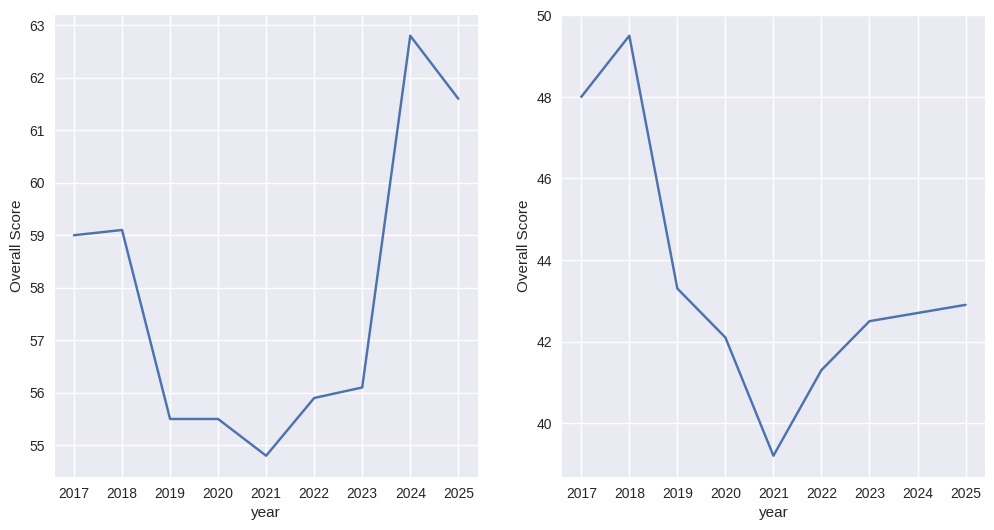

In [349]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.lineplot(data=os_usp,x='year',y='Overall Score',ax=axs[0])
sns.lineplot(data=os_unicamp,x='year',y='Overall Score',ax=axs[1])

In [354]:
#criação de um dataframe com os dados da Unicamp para os indicadores selecionados para os anos de 2023,2024 e 2025
unicamp= df_qs_2023_2025.loc[df_qs_2023_2025['Institution Name']=='Universidade Estadual de Campinas (Unicamp)',['year']+indicadores]
unicamp


,year,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Research Network Score,Employment Outcomes Score
231,2025,71.8,40.3,14.7,24.3,10.7,85.4,25.1
220,2024,70.3,50.1,13.0,24.9,11.7,53.7,9.6
209,2023,68.7,32.7,11.6,43.2,8.1,84.1,13.4


In [355]:
#criação de um dataframe com os dados da USP para os indicadores selecionados para os anos de 2023,2024 e 2025
usp= df_qs_2023_2025.loc[df_qs_2023_2025['Institution Name']=='Universidade de São Paulo',['year']+indicadores]
usp

,year,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Research Network Score,Employment Outcomes Score
91,2025,92.8,74.6,21.4,28.5,6.8,95.9,97.9
86,2024,92.4,82.9,19.2,29.9,6.0,90.9,89.7
114,2023,91.8,69.9,17.4,40.6,7.6,94.7,78.9


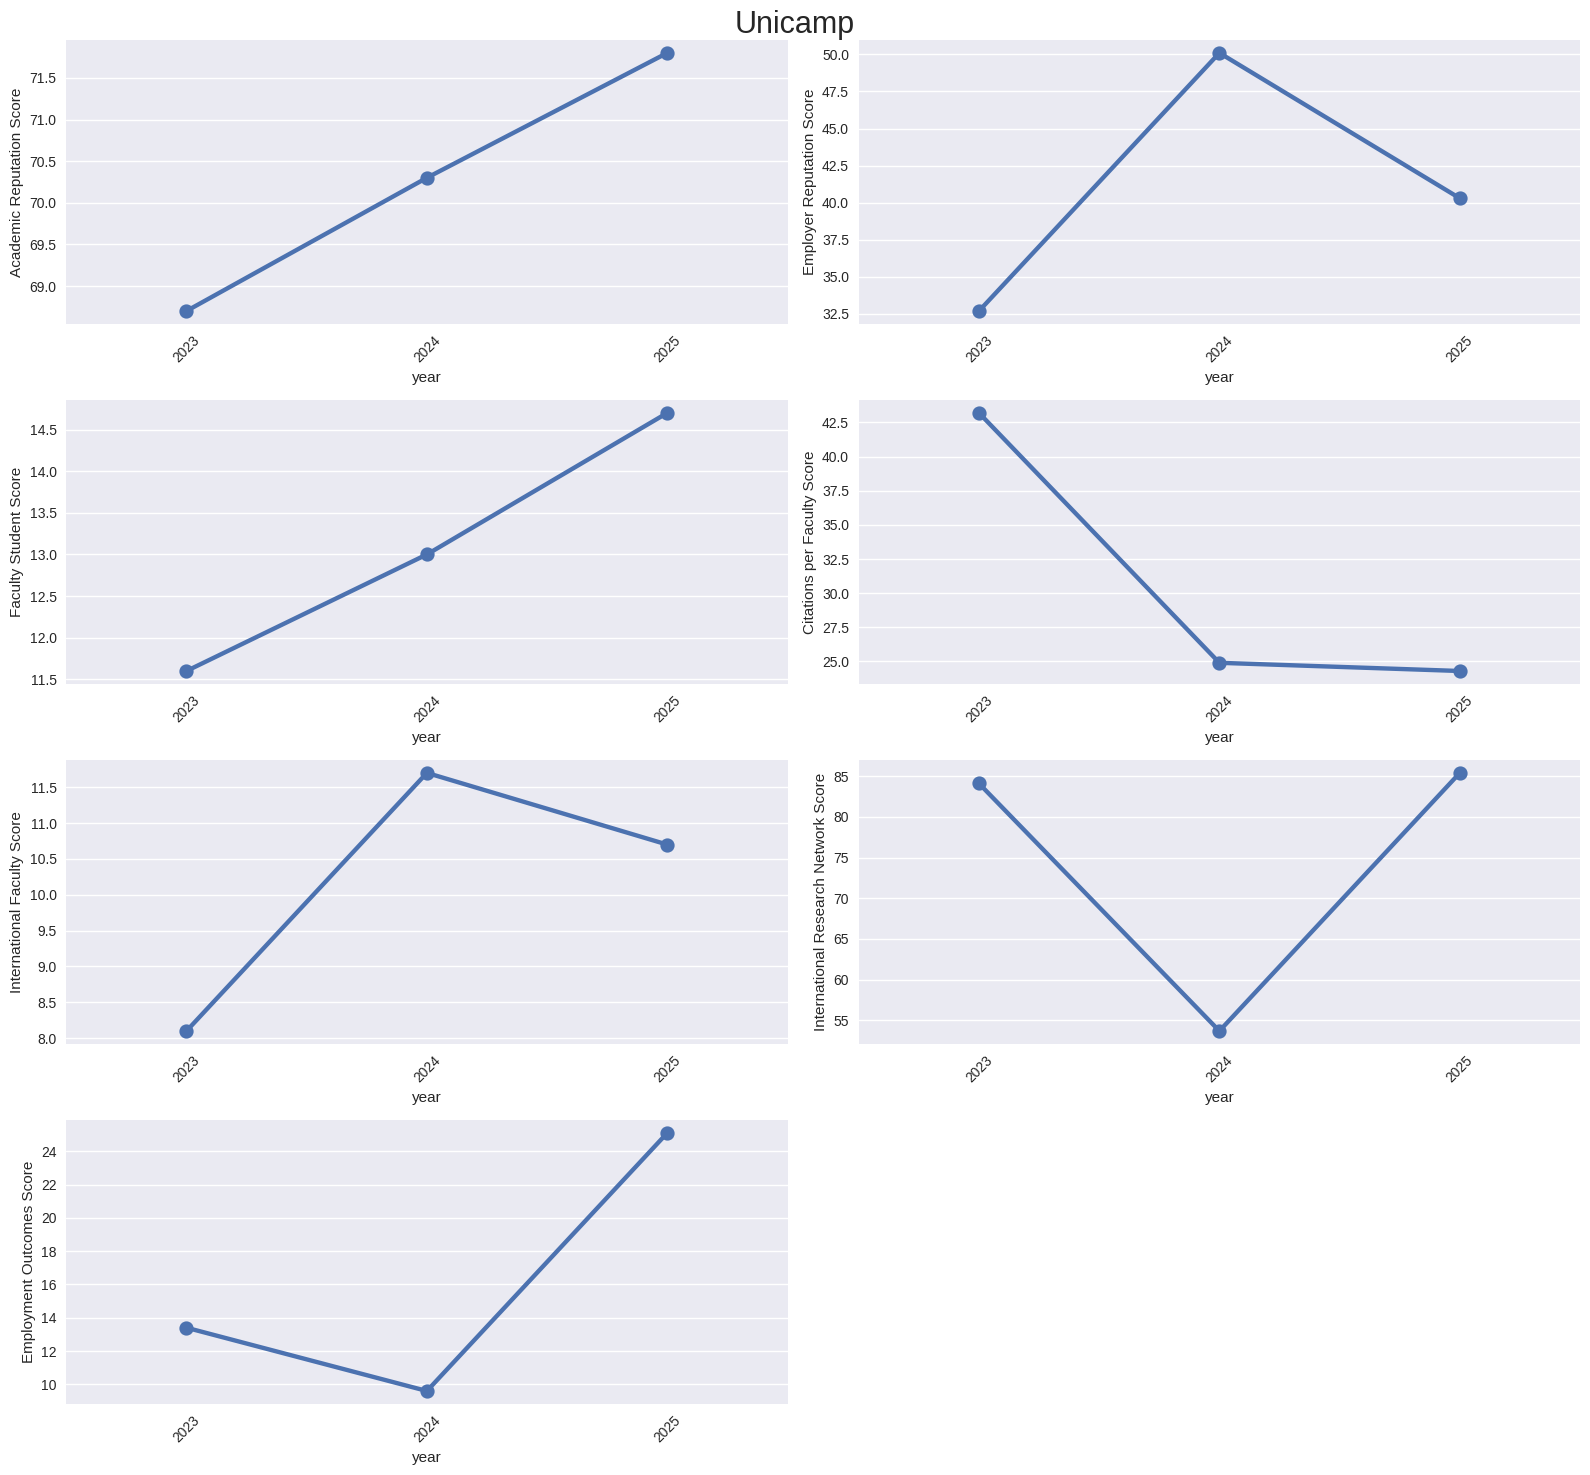

In [358]:
ncols=2
nrows=4
index_indicador=0
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('Unicamp', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        if row==3 and col==1:
            break
        sns.pointplot(data=unicamp,x='year',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
fig.delaxes(axs[row][col])
fig.tight_layout()
#axs[3,0].tick_params('x', labelrotation=45) 


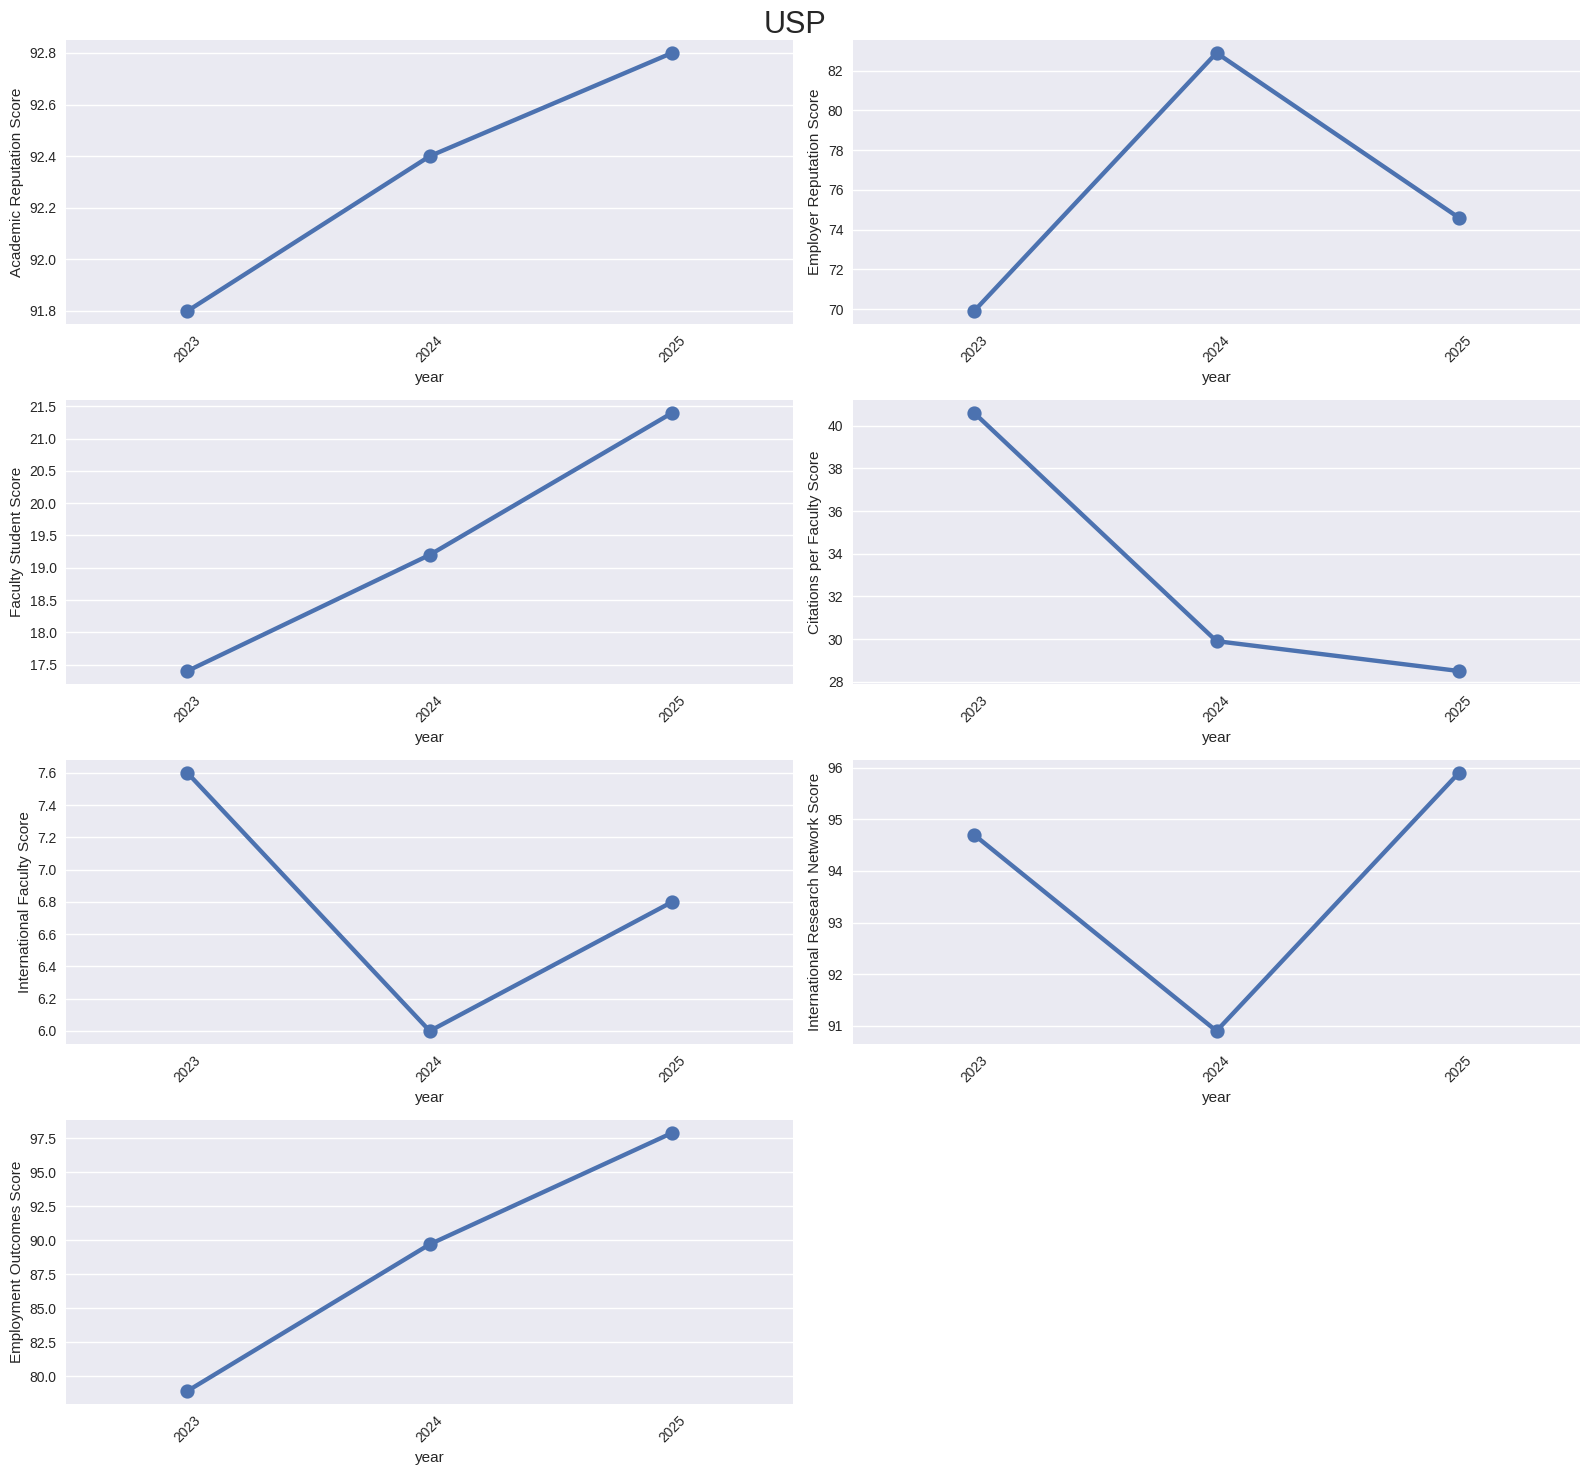

In [359]:
ncols=2
nrows=4
index_indicador=0
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('USP', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        if row==3 and col==1:
            break
        sns.pointplot(data=usp,x='year',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
fig.delaxes(axs[row][col])
fig.tight_layout()
#axs[3,0].tick_params('x', labelrotation=45) 
